# Python de cero a experto
**Autor:** Luis Miguel de la Cruz Salas

<a href="https://github.com/luiggix/Python_cero_a_experto">Python de cero a experto</a> by Luis M. de la Cruz Salas is licensed under <a href="https://creativecommons.org/licenses/by-nc-nd/4.0?ref=chooser-v1">Attribution-NonCommercial-NoDerivatives 4.0 International</a>

## Fertilidad mundial

Extraer información importante de un conjunto de datos y resaltarla mediante algunas técnicas simples.

### Paso 1. 
Incluir las bibliotecas necesarias para la lectura de datos y para la visualización.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Paso 2. 
Obtener la información de http://data.un.org/ con la búsqueda 'fertility rate', bajar el archvio y leerlo en un DataFrame.

In [3]:
fertilidad = pd.read_csv('UNdata_Export_20200418_014346536.csv')

### Paso 3. 
Extraer los datos de España y Suecia.

In [4]:
# Primero se agrupa por país 
paises = fertilidad.groupby('Country or Area')

In [5]:
print(type(paises))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [6]:
# Después se obtienen los datos de España y Suecia
spa = paises.get_group('Spain')
swe = paises.get_group('Sweden')

In [7]:
spa

,Country or Area,Year(s),Variant,Value
3402,Spain,2015-2020,Medium,1.330
3403,Spain,2010-2015,Medium,1.325
3404,Spain,2005-2010,Medium,1.454
3405,Spain,2000-2005,Medium,1.277
3406,Spain,1995-2000,Medium,1.187
3407,Spain,1990-1995,Medium,1.280
3408,Spain,1985-1990,Medium,1.460
3409,Spain,1980-1985,Medium,1.880
3410,Spain,1975-1980,Medium,2.550
3411,Spain,1970-1975,Medium,2.850


In [8]:
swe

,Country or Area,Year(s),Variant,Value
3500,Sweden,2015-2020,Medium,1.850
3501,Sweden,2010-2015,Medium,1.902
3502,Sweden,2005-2010,Medium,1.891
3503,Sweden,2000-2005,Medium,1.670
3504,Sweden,1995-2000,Medium,1.559
3505,Sweden,1990-1995,Medium,2.006
3506,Sweden,1985-1990,Medium,1.909
3507,Sweden,1980-1985,Medium,1.644
3508,Sweden,1975-1980,Medium,1.665
3509,Sweden,1970-1975,Medium,1.906


### Paso 4. 
Hacer las primeras gráficas para comparar los datos de España y Suecia.

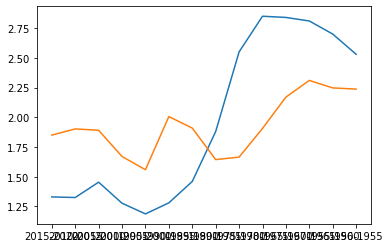

In [9]:
plt.plot(spa['Year(s)'], spa['Value'])
plt.plot(swe['Year(s)'], swe['Value'])

Como se puede observar en la gráfica anterior, los `xtics` están amontonados.

### Paso 5.
Rotar los `xtics` para apreciarlos mejor.

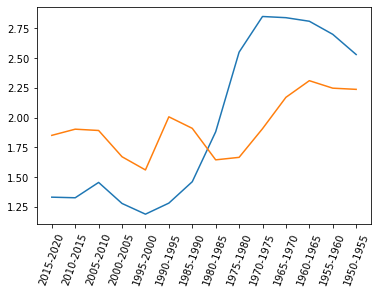

In [10]:
plt.xticks(rotation=70) # Rotación de 70 grados con respecto al eje x, en sentido horario.
plt.plot(spa['Year(s)'], spa['Value'])
plt.plot(swe['Year(s)'], swe['Value'])

Se observa en el eje $x$ la información de mayor (2015-2020) a menor (1950-1955).

### Paso 6.
Invertir la información en el eje $x$.

(14.0, -1.0)

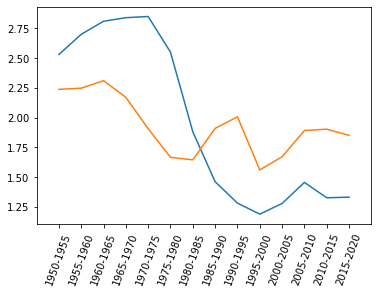

In [11]:
plt.xticks(rotation=70)
plt.plot(spa['Year(s)'], spa['Value'])
plt.plot(swe['Year(s)'], swe['Value'])
plt.xlim(14,-1,-1) # Obsérvese que se tienen 14 datos (0-13), por esa razón 
                   # se grafican desde el 14 hasta el -1, con un salto de -1.

### Paso 7.
Graficamos una línea recta en el valor 2.1, que es considerado el valor de reemplazo.

(14.0, -1.0)

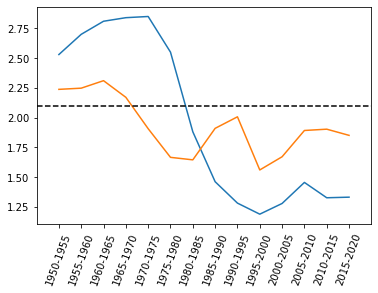

In [12]:
plt.xticks(rotation=70) 
plt.plot(spa['Year(s)'], spa['Value'])
plt.plot(swe['Year(s)'], swe['Value'])
plt.plot([14,-1],[2.1,2.1], 'k--') # Línea que muestra el valor de reemplazo,
                                   # Se usa negro y línea punteada para distinguirla.
plt.xlim(14,-1,-1)

### Paso 8.
Decoramos la gráfica para tener una primera versión de esta visualización.

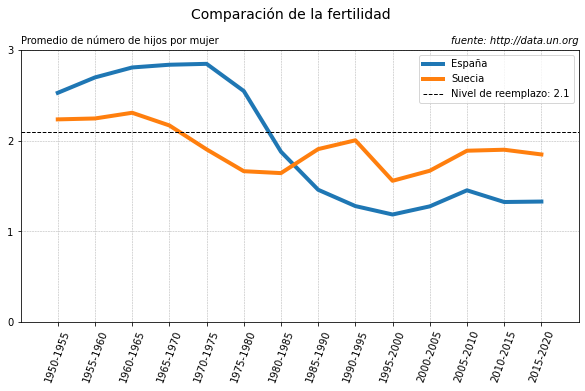

In [13]:
fig = plt.figure(figsize=(10,5)) # Cambiamos el tamaño de la figura
plt.xticks(rotation=70) 
plt.plot(spa['Year(s)'], spa['Value'], lw=4.0, label='España')
plt.plot(swe['Year(s)'], swe['Value'], lw=4.0, label='Suecia')
plt.plot([14,-1],[2.1,2.1], 'k--', lw=1.0, label='Nivel de reemplazo: 2.1') 
plt.xlim(14,-1,-1)
plt.ylim(0,3)             # Límites en el eje y 
plt.yticks([0,1,2,3])     # Marcas en el eje y
plt.grid(ls='--', lw=0.5) # Rejilla

# Información adicional y títulos
plt.title('Promedio de número de hijos por mujer', loc='left', fontsize=10)
plt.title('fuente: http://data.un.org', loc='right', fontstyle='italic', fontsize=10)
plt.suptitle('Comparación de la fertilidad',y = 1.0, fontsize=14)
plt.legend()

### Paso 9.
Agregar un texto en el extremo derecho de cada curva para identificarla. El objetivo es eliminar las leyendas de las curvas, pues más adelante tendremos muchas graficas que serán difíciles de distinguir.

Text(0, 1.85, ' Sue 1.85')

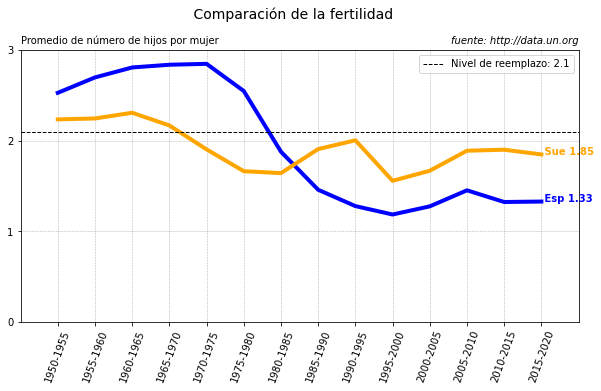

In [14]:
fig = plt.figure(figsize=(10,5)) # Cambiamos el tamaño de la figura
plt.xticks(rotation=70)
# Cambiamos el color y quitamos las leyendas
spa_color = 'blue'
swe_color = 'orange'
plt.plot(spa['Year(s)'], spa['Value'], lw=4.0, color=spa_color)
plt.plot(swe['Year(s)'], swe['Value'], lw=4.0, color=swe_color)
plt.plot([14,-1],[2.1,2.1], 'k--', lw=1.0, label='Nivel de reemplazo: 2.1') 
plt.xlim(14,-1,-1)
plt.ylim(0,3)             # Límites en el eje y 
plt.yticks([0,1,2,3])     # Marcas en el eje y
plt.grid(ls='--', lw=0.5) # Rejilla

# Información adicional y títulos
plt.title('Promedio de número de hijos por mujer', loc='left', fontsize=10)
plt.title('fuente: http://data.un.org', loc='right', fontstyle='italic', fontsize=10)
plt.suptitle(' Comparación de la fertilidad',y = 1.0, fontsize=14)
plt.legend()

# Agregamos el texto en cada curva
spa_val = spa['Value'].iloc[0]
swe_val = swe['Value'].iloc[0]
plt.text(x = 0, y = spa_val, s = ' Esp {:1.2f}'.format(spa_val), color = spa_color, weight = 'bold')
plt.text(x = 0, y = swe_val, s = ' Sue {:1.2f}'.format(swe_val), color = swe_color, weight = 'bold')


La gráfica anterior muestra como el número promedio de hijos por mujer se incrementó levemente de 1950 a 1965 para Suecia, para después reducirse por debajo del nivel de reemplazo (NR). Desde entonces ha oscilado un par de veces y parece que a partir de 2005 comienza a estabilizarse en un valor por debajo del NR. Algo similar sucede con España, donde el incremento fue un poco más notorio de 1950 hasta 1975, para después bajar y estabilizarse en la década pasada. ¿Qué hechos historicos se podrían correlacionar con estos datos?

Lo que se desea mostrar (la historia que se quiere contar) es que la razón de nacimientos en todos los países se ha estabilizado, lo cual nos puede llevar a que la población mundial realmente se estabilice en aproximadamente 90mil millones de seres humanos.

### Paso 10.
Hacer el mismo análisis para México y Yemen.

In [15]:
# Extraer los datos de México y Yemen
mex = paises.get_group('Mexico')
yem = paises.get_group('Yemen')

### Paso 11.
Obtener el valor máximo de fertilidad de ambos países para usarlo en los límites del eje $y$.

In [16]:
# Importamos la biblioteca ceil para redondear el valor máximo
from math import ceil

y_maximo = max(mex['Value'].max(), yem['Value'].max()) # El máximo entre dos países.
yticks = [i for i in range(0,ceil(y_maximo)+1)] # Lista de ticks.
print(y_maximo, yticks)

8.8 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### Paso 12.
Graficar usando el mismo script que se usó en el punto 4.

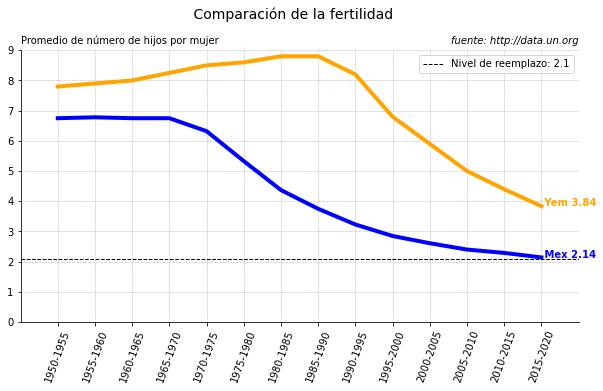

In [17]:
fig = plt.figure(figsize=(10,5)) # Cambiamos el tamaño de la figura
plt.xticks(rotation=70)
# Cambiamos el color y quitamos las leyendas
mex_color = 'blue'
yem_color = 'orange'
plt.plot(mex['Year(s)'], mex['Value'], lw=4.0, c=mex_color)
plt.plot(yem['Year(s)'], yem['Value'], lw=4.0, c=yem_color)
plt.plot([14,-1],[2.1,2.1], 'k--', lw=1.0, label='Nivel de reemplazo: 2.1') 
plt.xlim(14,-1,-1)
plt.ylim(0, y_maximo)     # Límites en el eje y 
plt.yticks(yticks)        # Marcas en el eje y
plt.grid(ls='--', lw=0.5) # Rejilla

# Información adicional y títulos
plt.title('Promedio de número de hijos por mujer', loc='left', fontsize=10)
plt.title('fuente: http://data.un.org', loc='right', fontstyle='italic', fontsize=10)
plt.suptitle(' Comparación de la fertilidad',y = 1.0, fontsize=14)
plt.legend()

# Agregamos el texto en cada curva
mex_val = mex['Value'].iloc[0]
yem_val = yem['Value'].iloc[0]
plt.text(x = 0, y = mex_val, s = ' Mex {:1.2f}'.format(mex_val), c = mex_color, weight = 'bold')
plt.text(x = 0, y = yem_val, s = ' Yem {:1.2f}'.format(yem_val), c = yem_color, weight = 'bold')

# Quitamos la línea derecha y la de arriba del marco de los ejes
ejes = fig.axes
ejes[0].spines['right'].set_visible(False)
ejes[0].spines['top'].set_visible(False)

Observamos en la gráfica anterior que la fertilidad en México y Yemen son mayores a España y Suecia.

¿Qué más puede decir de estas curvas con respecto de las de España y Suecia?

### Paso 13.
Graficamos los cuatro países juntos para comparar la información.

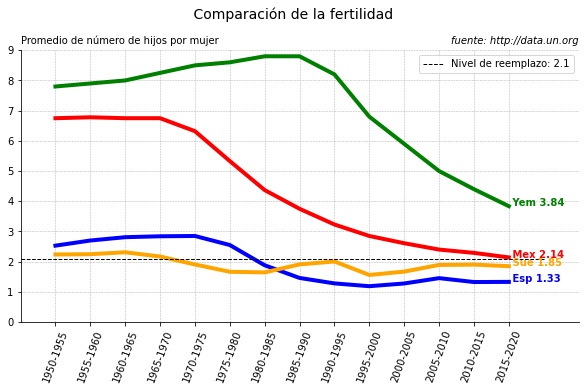

In [18]:
fig = plt.figure(figsize=(10,5)) # Cambiamos el tamaño de la figura
plt.xticks(rotation=70)
# Cambiamos el color y quitamos las leyendas
spa_color = 'blue'
swe_color = 'orange'
mex_color = 'red'
yem_color = 'green'
plt.plot(spa['Year(s)'], spa['Value'], lw=4.0, c=spa_color)
plt.plot(swe['Year(s)'], swe['Value'], lw=4.0, c=swe_color)
plt.plot(mex['Year(s)'], mex['Value'], lw=4.0, c=mex_color)
plt.plot(yem['Year(s)'], yem['Value'], lw=4.0, c=yem_color)

plt.plot([14,-1],[2.1,2.1], 'k--', lw=1.0, label='Nivel de reemplazo: 2.1') 
plt.xlim(14,-2,-1)
plt.ylim(0,y_maximo)      # Límites en el eje y (usamos y_maximo)
plt.yticks(yticks)        # Marcas en el eje y
plt.grid(ls='--', lw=0.5) # Rejilla

# Información adicional y títulos
plt.title('Promedio de número de hijos por mujer', loc='left', fontsize=10)
plt.title('fuente: http://data.un.org', loc='right', fontstyle='italic', fontsize=10)
plt.suptitle(' Comparación de la fertilidad',y = 1.0, fontsize=14)
plt.legend()

# Agregamos el texto en cada curva
spa_val = spa['Value'].iloc[0]
swe_val = swe['Value'].iloc[0]
mex_val = mex['Value'].iloc[0]
yem_val = yem['Value'].iloc[0]
plt.text(x = 0, y = spa_val, s = ' Esp {:1.2f}'.format(spa_val), c = spa_color, weight = 'bold')
plt.text(x = 0, y = swe_val, s = ' Sue {:1.2f}'.format(swe_val), c = swe_color, weight = 'bold')
plt.text(x = 0, y = mex_val, s = ' Mex {:1.2f}'.format(mex_val), c = mex_color, weight = 'bold')
plt.text(x = 0, y = yem_val, s = ' Yem {:1.2f}'.format(yem_val), c = yem_color, weight = 'bold')

# Quitamos la línea derecha y la de arriba del marco de los ejes
ejes = fig.axes
ejes[0].spines['right'].set_visible(False)
ejes[0].spines['top'].set_visible(False)

¿Cómo se comparan estas gráficas? ¿Qué se puede pensar de los países que tienen un índice de fertilidad que está por arriba del factor NR? ¿Cómo podrían impactar los cuestiones históricas y geográficas de esos países en su fertilidad? ¿Qué más se observa en estas gráficas?

### Paso 14.
Realizar las graficas para todos los países de la base de datos.

In [19]:
# La lista de paises se puede obtener usando la función: paises.groups.keys(). 
# Imprimimos la lista de todos los países:
for p in paises.groups.keys():
    print(p, end=', ')

Afghanistan, Africa, Albania, Algeria, American Samoa, Andorra, Angola, Anguilla, Antigua and Barbuda, Argentina, Armenia, Aruba, Asia, Australia, Australia/New Zealand, Austria, Azerbaijan, Bahamas, Bahrain, Bangladesh, Barbados, Belarus, Belgium, Belize, Benin, Bermuda, Bhutan, Bolivia (Plurinational State of), Bonaire, Sint Eustatius and Saba, Bosnia and Herzegovina, Botswana, Brazil, British Virgin Islands, Brunei Darussalam, Bulgaria, Burkina Faso, Burundi, Cabo Verde, Cambodia, Cameroon, Canada, Caribbean, Cayman Islands, Central African Republic, Central America, Central Asia, Central and Southern Asia, Chad, Channel Islands, Chile, China, China, Hong Kong SAR, China, Macao SAR, Colombia, Comoros, Congo, Cook Islands, Costa Rica, Croatia, Cuba, Curaçao, Cyprus, Czechia, Côte d'Ivoire, Dem. People's Republic of Korea, Democratic Republic of the Congo, Denmark, Djibouti, Dominica, Dominican Republic, Eastern Africa, Eastern Asia, Eastern Europe, Eastern and South-Eastern Asia, Ecu

In [20]:
# Primero vamos a definir una función para inicializar el entorno de la gráfica (el canvas).
def inicializaGrafica(y_maximo, yticks):
    """
    Inicializa algunos parámetros de la figura.
    
    Parameters
    ----------
    y_maximo : int
        Valor máximo para el eje y.
    
    yticks : list
        Lista de valores para los ticks en el eje y.
    """
    fig = plt.figure(figsize=(10,10)) # Cambiamos el tamaño de la figura
    plt.xticks(rotation=70)
    plt.xlim(14,-2,-1)
    plt.ylim(0,y_maximo)   # Límites en el eje y (usamos y_maximo)
    plt.yticks(yticks)     # Marcas en el eje y
    plt.grid(ls='--', lw=0.5) # Rejilla

    # Información adicional y títulos
    plt.title('Promedio de número de hijos por mujer', loc='left', fontsize=10)
    plt.title('fuente: http://data.un.org', loc='right', fontstyle='italic', fontsize=10)
    plt.suptitle(' Comparación de la fertilidad', y = 0.94, fontsize=14)

    ejes = fig.axes
    ejes[0].spines['right'].set_visible(False)
    ejes[0].spines['top'].set_visible(False)
    ejes[0].spines['left'].set_visible(False)
    ejes[0].spines['bottom'].set_visible(False)
    
    # Modificamos algunos parámetros de los ticks en el eje y
    ejes[0].tick_params(axis='y', width=1, length=25)
    
# Ahora definimos una función para graficar la información de cada país.
def graficaFertilidad(paises, parametros={}):
    """
    Realiza la gráfica de todos los países.
    
    Parameters
    ----------
    paises : DataFrameGroupBy
        Dataframe generado por GroupBy con la información de los países.
    
    parametros : dict
        Parámetros para generar la gráfica.
    """
    for p in paises.groups.keys():
        pais = paises.get_group(p)
        plt.plot(pais['Year(s)'], pais['Value'], **parametros) 
    
    # Al final de todas las gráficas ponemos la del nivel de reemplazo 
    # para que apareza sobre todas ellas y se note mejor (también es posible usar zorder)
    plt.plot([14,-1],[2.1,2.1], 'k--', lw=1.0, label='Nivel de reemplazo: 2.1')
    plt.legend()

In [21]:
# Calculamos el máximo de todos los países y lo usamos para generar los yticks
y_maximo = 0
for p in paises.groups.keys():
    temporal = paises.get_group(p)['Value'].max()
    if y_maximo < temporal:
        y_maximo = temporal
        p_maximo = p
        
yticks = [i for i in range(0,ceil(y_maximo)+1)]
print(p_maximo, y_maximo, yticks)

Yemen 8.8 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


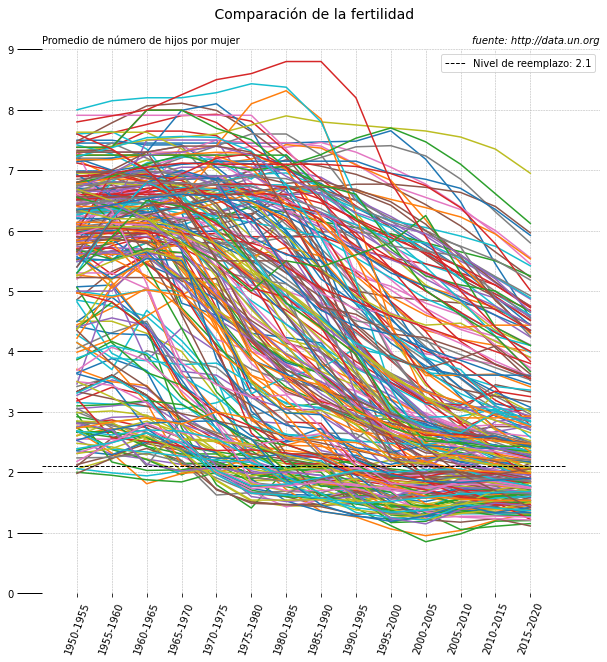

In [22]:
# Graficamos todos los países.
inicializaGrafica(y_maximo, yticks)
graficaFertilidad(paises)

Esta gráfica es bastante interesante y colorida! Sin embargo poco útil. Aunque es posible identificar, si nos fijamos bien, grupos de países que inician con una fertilidad entre 5 y 7, que después bajan conforme pasan las décadas. Y otro grupo de países entre el 2 y 3 que se matienen al rededor del nivel de reemplazo (2.1). Como vimos en la celda anterior, Yemen es el país que tiene la máxima fertilidad, durante los años de 1985 a 1990. 

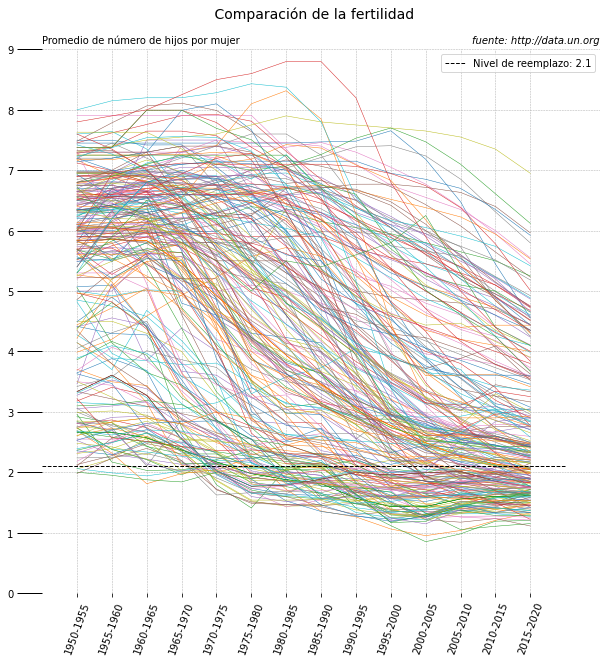

In [23]:
# Hacemos la misma gráfica, pero con las líneas más delgadas para intentar distinguir algo más.
inicializaGrafica(y_maximo, yticks)
graficaFertilidad(paises, {'lw':0.5})

Esta gráfica "desenreda" un poco la información, pero sigue siendo poco útil.

### Paso 15.
Analizar los países de Suecia, España, México y Yemen, dentro de las gráficas de todos los países. Agregar algunos otros que sean de interés.

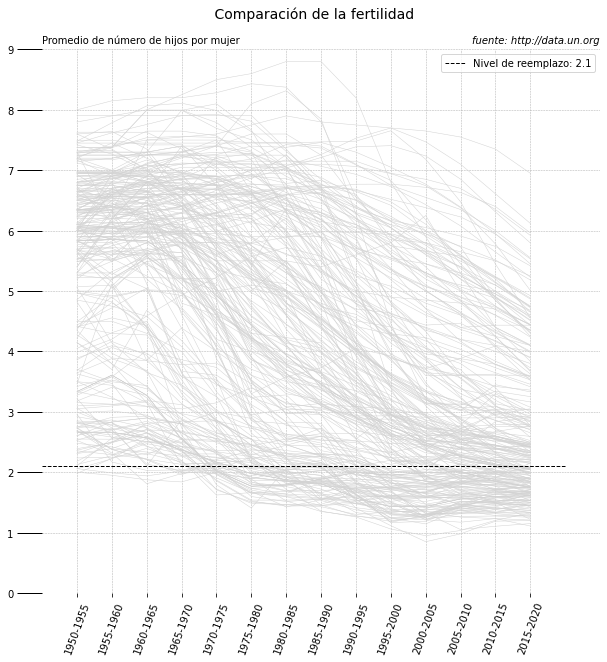

In [24]:
# Primero usamos un color muy tenue para graficar todos los países.
inicializaGrafica(y_maximo, yticks)
graficaFertilidad(paises, {'lw':0.5, 'c':'lightgrey'})

Esta última gráfica será la base (el contexto) para ubicar a los países que son de nuestro interés.

In [25]:
# Definimos una función para graficar un solo país con parámetros que permitan realzar la curva 
def graficaFertilidadUnPais(paises, p, parametros={}):
    """
    Realiza la gráfica de un solo país.
    
    Parameters
    ----------
    paises : DataFrameGroupBy
        Dataframe generado por GroupBy con la información de los países.
    
    parametros : dict
        Parámetros para generar la gráfica.
    """
    pais = paises.get_group(p)
    
    # Graficamos el país con los parámetros requeridos
    plt.plot(pais['Year(s)'], pais['Value'], **parametros)
    
    # Ponemos un texto al final de la curva para mostrar el 
    # nombre del país y el valor final de fertilidad
    pais_val = pais['Value'].iloc[0]
    plt.text(x = 0, y = pais_val, 
             s = ' {} {:1.2f}'.format(p, pais_val), 
             c = parametros['c'], weight = 'bold')
    
    # Ponemos el valor inicial de fertilidad al principio de la curva.
    pais_val = pais['Value'].iloc[-1]    
    plt.text(x = 14, y = pais_val, 
             s = '{:1.2f} '.format(pais_val), 
             c = parametros['c'], weight = 'bold')


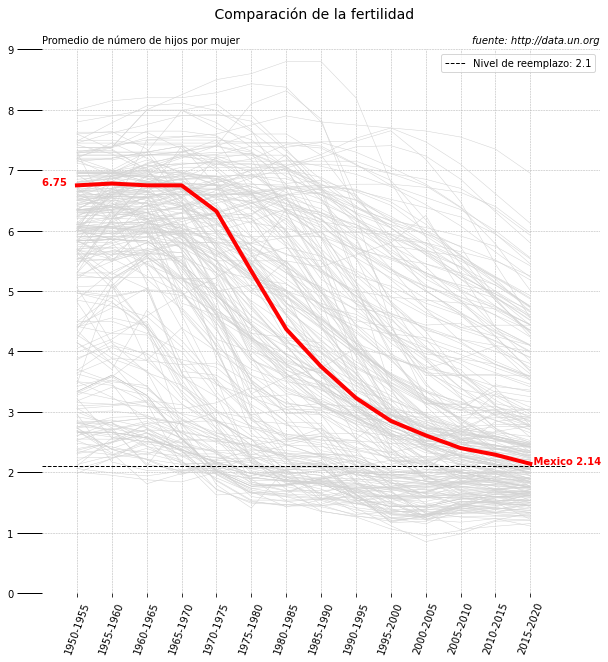

In [26]:
# Hacemos la gráfica base
inicializaGrafica(y_maximo, yticks)
graficaFertilidad(paises, {'lw':0.5, 'c':'lightgrey'})

# Graficamos para México con parámetros de realce (ancho 4 y color rojo)
par_mex = {'lw':4.0, 'c':'red'}
graficaFertilidadUnPais(paises, 'Mexico', par_mex)

Esta gráfica nos da mucho mayor información. Además de tener todo el contexto de los demás países, podemos observar como ha cambiado la fertilidad en nuestro país, desde los años 50 que tenía un valor de 6.75 y en los años 70s comenzó su declive. Fue en el año de 1974 cuando se instaló la CONAPO (Consejo Nacional de Población) y uno de sus primeros lemas fue *“La familia pequeña vive mejor”* (aún recuerdo esos promocionales de la TV). Es muy probable que este hecho haya impactado en esa disminución de los hijos por familia durante las siguientes décadas. Actualmente el valor es de 2.14, apenas un poco arriba del NR y la tendencia es a la baja. En mi experiencia, al hablar con jóvenes en edad reproductiva, parece que para un porcentaje alto de ellos (no tengo los datos exactos), ya no es un objetivo de vida tener hijos, por lo que la espectativa es que el nivel de hijos pase por abajo del NR en nuestro país en los próximos años.

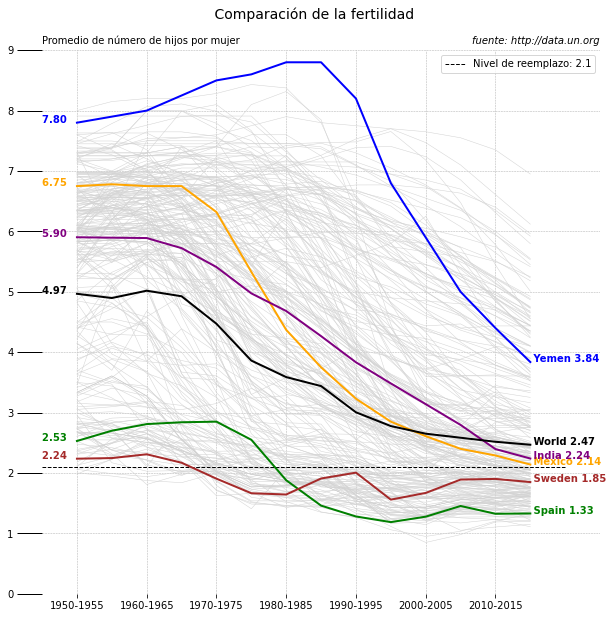

In [27]:
# Hacemos la gráfica base
inicializaGrafica(y_maximo, yticks)
graficaFertilidad(paises, {'lw':0.5, 'c':'lightgrey'})

# Finalmente hacemos la gráfica para varios países para hacer la comparación entre ellos.
# NOTA: La base de datos también trae la información del número de hijos promedio de todo
# el mundo ('World') el cual graficamos para comparar.
colores = ['orange', 'blue', 'green', 'brown', 'purple','black']
paises_l = ['Mexico', 'Yemen', 'Spain', 'Sweden', 'India', 'World']
for p, c in zip(paises_l, colores):
    par = {'lw':2.0, 'c':c}
    graficaFertilidadUnPais(paises, p, par)

# Decidimos dibujar menos xticks para mayor claridad.
plt.xticks([13, 11, 9, 7, 5, 3, 1], rotation=0)

plt.savefig('fertilidad.pdf')

¿Puede Usted contar la historia de esta última gráfica?